In [10]:
import numpy as np
import seaborn as sns
import scipy
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from matplotlib import cm, colormaps, colors
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

from scipy.spatial import ConvexHull
from scipy.spatial import distance
import itertools
from voronoi_utils import *
from helperFunctions import *


In [11]:
xMin= 0
xMax=1000
yMin=0
yMax=1000

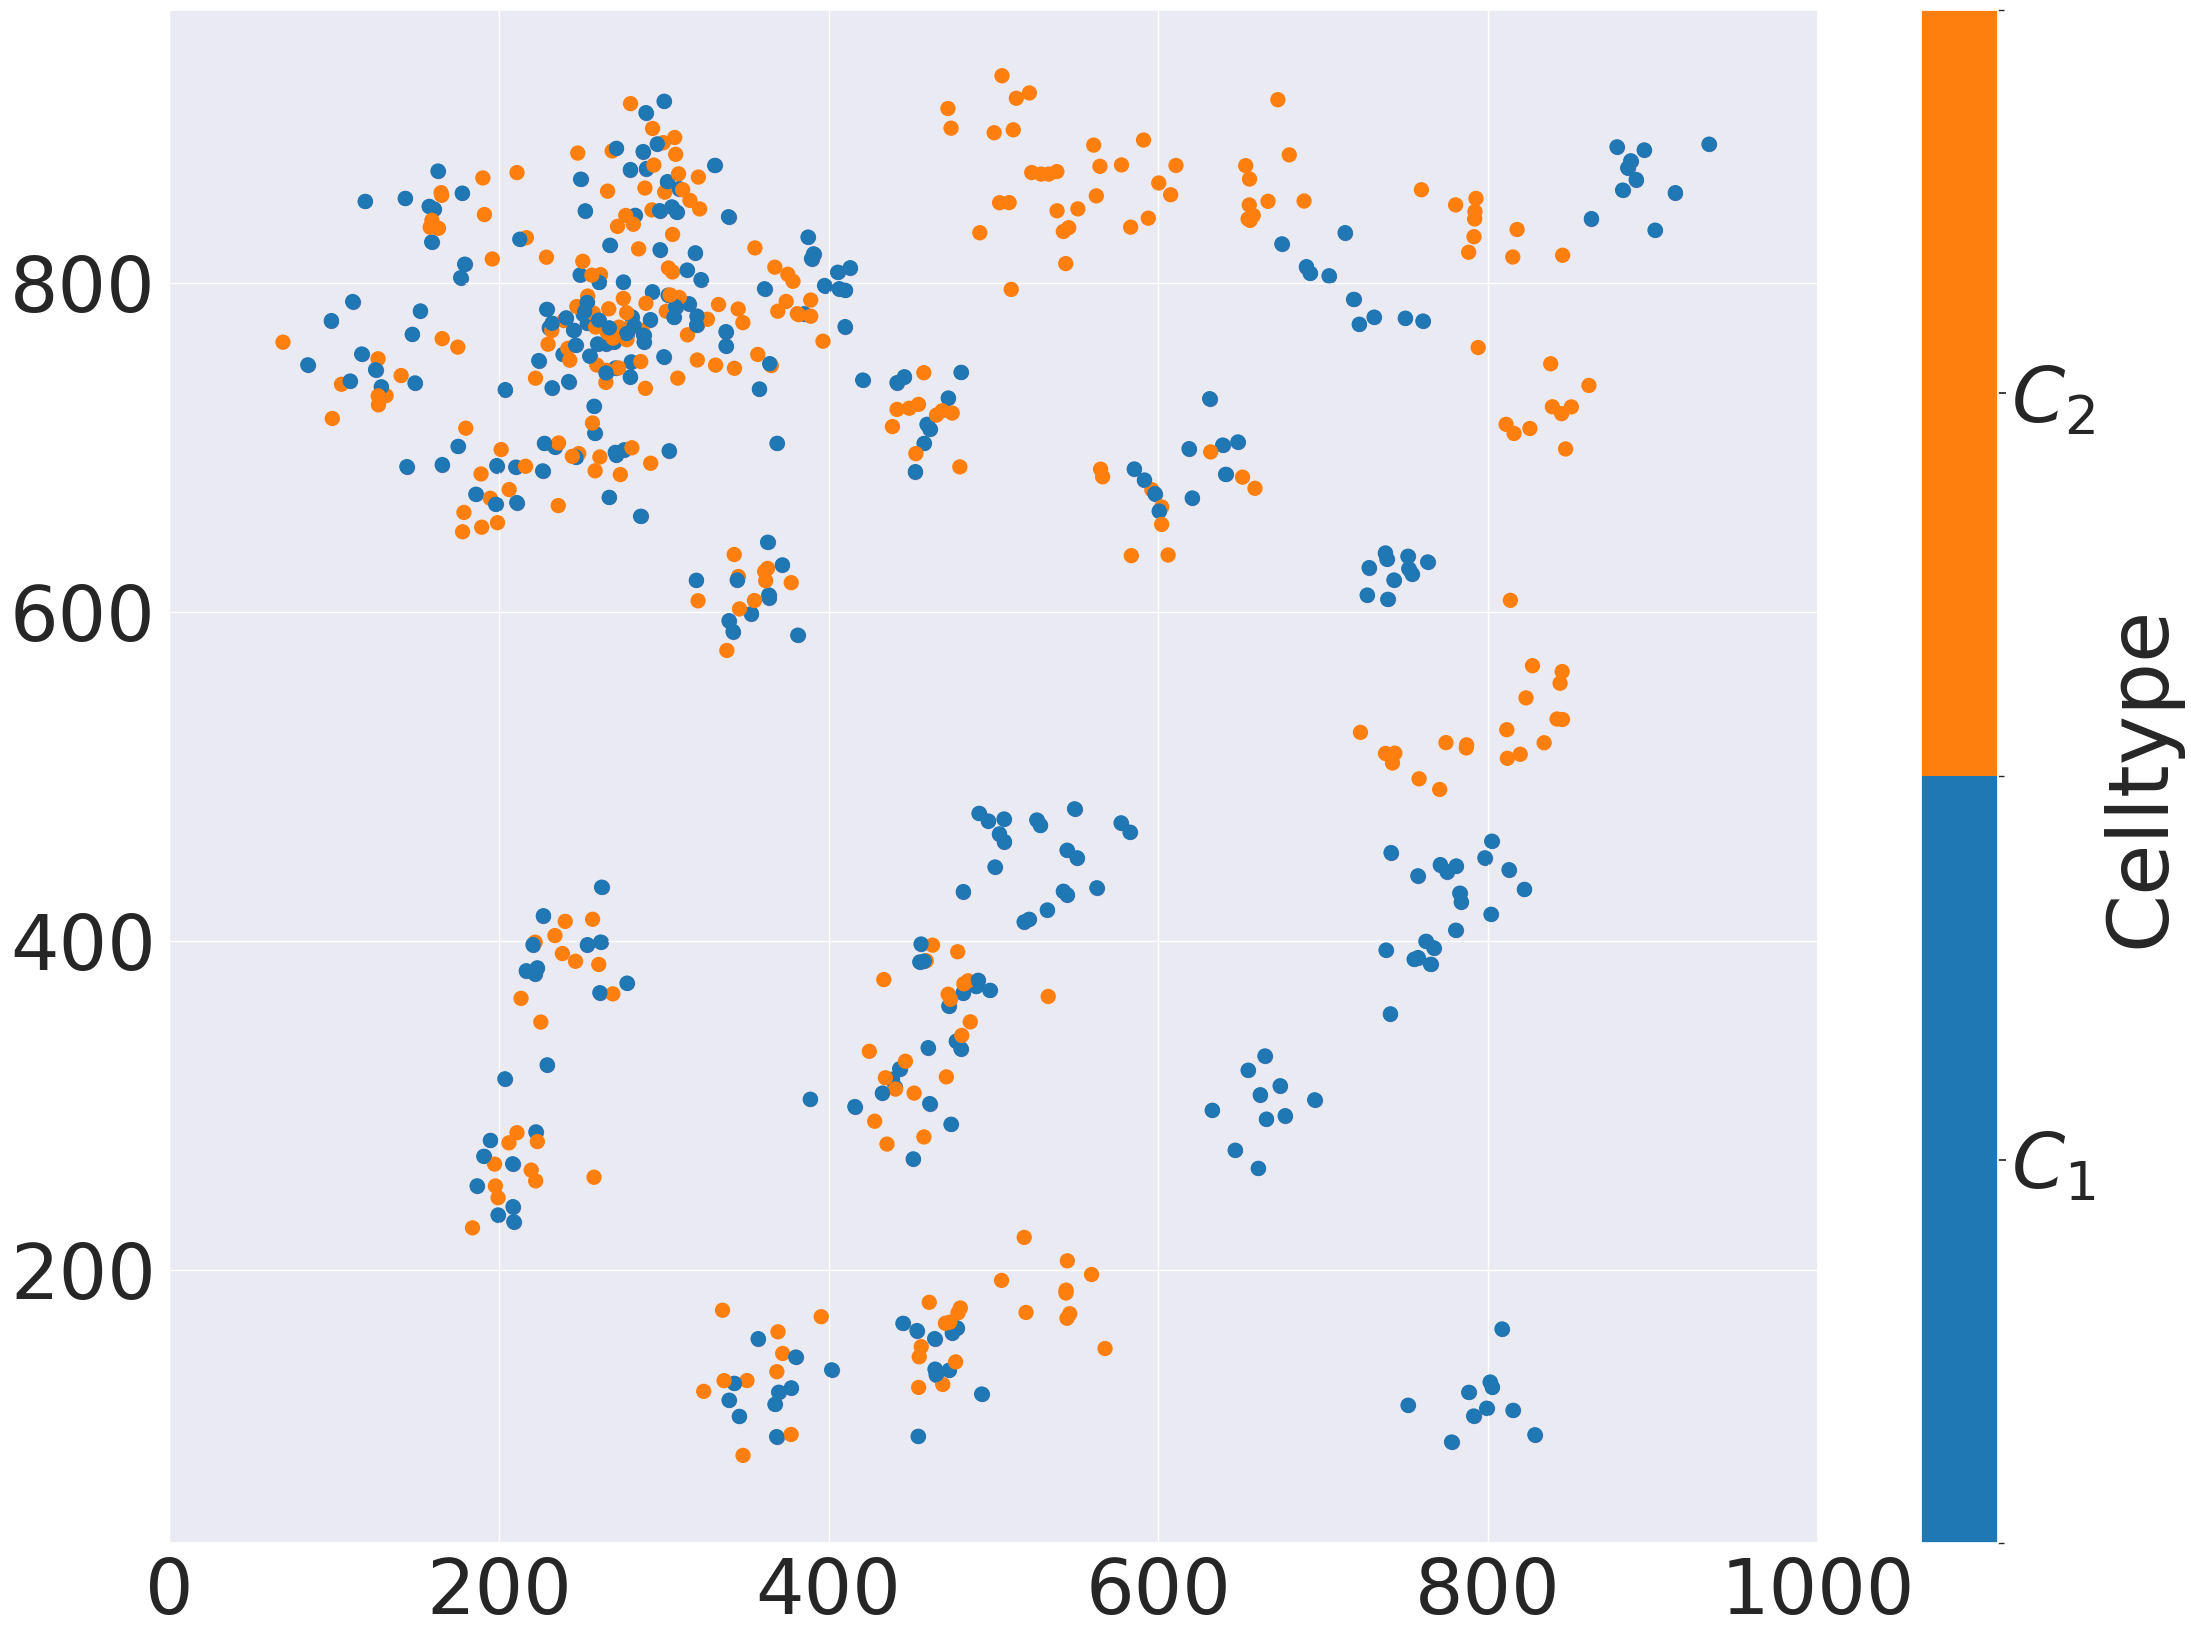

In [12]:
from SyntheticDataset1_functions import generate_synthetic_dataset1, cross_pcf_synthetic_dataset1
pc, c1mask = generate_synthetic_dataset1()
# plt.savefig("figures/synthetic_d1.png")

points1 = pc.points

In [13]:
u_s_all = compute_u_s_cross_all_points(points1, c1mask)


def compute_u_id_cross(N_c1, N_total, density, xMin, xMax, yMin, yMax, N=100):

    dict_all_iters =  run_poisson_cross(N_c1, N_total, density, xMin, xMax, yMin, yMax, N=N, show=False)
#     hist_k(dict_all_iters)
    u_id = avg_k(dict_all_iters)
    
    return u_id, dict_all_iters



N_total = points1.shape[0]
N_c1 = np.count_nonzero(c1mask)
N_c2 = np.count_nonzero(np.logical_not(c1mask))

areaTotal, xDelta, yDelta = calculate_area_rectangle(xMin, xMax, yMin, yMax)
density = N_total/areaTotal
# N_poisson = 100

u_id, dict_all_iters = compute_u_id_cross(N_c1, N_total, density, xMin, xMax, yMin, yMax, N=100)




/home/mila/m/myriam.lizotte/pcf/ExtendedCorrelationFunctions/voronoi_utils.py:277: RuntimeWarning: Mean of empty slice.
  avg_k = np.array(list_k).mean()
/home/mila/m/myriam.lizotte/env_pcf/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [14]:
# for a given k, average k-nn distance. for comparison with their r

def get_equivalent_r_knn(points1, k):
    # average the kth in each row
    D = distance.squareform(distance.pdist(points1))

    r = np.mean(np.partition(D, k, axis = 1)[:, k])
    
    return r

# for a given k, average distance to their voronoi neighborhood. for comparison with their r

def get_equivalent_r(k, points1):
    vor = Voronoi_cells(points1, show=False)
    adj = make_adj_matrix(vor)
    shortest_path_dists = compute_shortest_path_dist(adj)
    D = distance.squareform(distance.pdist(points1))

    A = np.where(shortest_path_dists == k)

    row = [vor.point_region.tolist().index(a) for a in A[0]] # index of the point instead of the regions
    col = [vor.point_region.tolist().index(a) for a in A[1]] # index of the point instead of the regions

    r = np.mean(D[row, col])

    print (r)
    return r

def get_equivalent_r_faster(k, vor, shortest_path_dists):
    points1= vor.points
    D = distance.squareform(distance.pdist(points1))

    A = np.where(shortest_path_dists == k)

    row = [vor.point_region.tolist().index(a) for a in A[0]] # index of the point instead of the regions
    col = [vor.point_region.tolist().index(a) for a in A[1]] # index of the point instead of the regions

    r = np.mean(D[row, col])

    return r

In [1]:
# for k in [2, 4, 5,6, 10, 14]:
    
#     r = get_equivalent_r_faster(k, vor, shortest_path_dists)
#     print(r)

In [ ]:
for k in [2, 4, 5,6, 10, 14]:
    
    r = get_equivalent_r(points1, k)
    # ours (Voronoi)
    tcm = topographicalCorrelationMapVoronoi(u_s_all, u_id, pc,'Celltype','$C_1$','Celltype','$C_2$', k=k, maxCorrelationThreshold=5.0,kernelRadius=150,kernelSigma=r,visualiseStages=False)

    
    plt.figure(figsize=(20,20))
    l = int(np.ceil(np.max(np.abs([tcm.min(),tcm.max()]))))
    plt.imshow(tcm,cmap='RdBu_r',vmin=-l,vmax=l,origin='lower')
    plt.colorbar(label='$\Gamma_{C_1 C_2}$')
    plt.title("k = {}".format(k))
    ax = plt.gca()
    ax.grid(False)
    plt.savefig("figures/TCM_voronoi_12_k="+str(k)+".png")



In [ ]:
# C21 instead of C12

u_s_all_21 = compute_u_s_cross_all_points(points1, np.logical_not(c1mask))


def compute_u_id_cross(N_c1, N_total, density, xMin, xMax, yMin, yMax, N=100):

    dict_all_iters =  run_poisson_cross(N_c1, N_total, density, xMin, xMax, yMin, yMax, N=N, show=False)
#     hist_k(dict_all_iters)
    u_id = avg_k(dict_all_iters)
    
    return u_id, dict_all_iters



N_total = points1.shape[0]
N_c1 = np.count_nonzero(c1mask)
N_c2 = np.count_nonzero(np.logical_not(c1mask))

areaTotal, xDelta, yDelta = calculate_area_rectangle(xMin, xMax, yMin, yMax)
density = N_total/areaTotal
# N_poisson = 100

u_id_21, dict_all_iters_21 = compute_u_id_cross(N_c2, N_total, density, xMin, xMax, yMin, yMax, N=100)




In [ ]:
# ours (Voronoi)

for k in [2, 4, 5, 10, 14]:
    
    r = get_equivalent_r(points1, k)
    tcm = topographicalCorrelationMapVoronoi(u_s_all_21, u_id_21, pc,'Celltype','$C_1$','Celltype','$C_2$', k=k, maxCorrelationThreshold=5.0,kernelRadius=150,kernelSigma=r,visualiseStages=False)


    plt.figure(figsize=(20,20))
    l = int(np.ceil(np.max(np.abs([tcm.min(),tcm.max()]))))
    plt.imshow(tcm,cmap='RdBu_r',vmin=-l,vmax=l,origin='lower')
    plt.colorbar(label='$\Gamma_{C_2 C_1}(r=50)$')
    plt.title("k = {}".format(k))
    ax = plt.gca()
    ax.grid(False)
    
    plt.savefig("figures/TCM_voronoi_21_k="+str(k)+".png")



In [ ]:
# def topographicalCorrelationMapVoronoi(u_s_all, u_id, pc,labelNameA,labelA,labelNameB,labelB, k=5,maxCorrelationThreshold=5.0,kernelRadius=150,kernelSigma=50,visualiseStages=False):
    
#     for labelName in [labelNameA,labelNameB]:
#         labelType = pc.labels[labelName]['Type']
#         if labelType != 'categorical':
#             raise RuntimeError(f'The label {labelName} is not a categorical label.')
    
#     if labelA not in pc.labels[labelNameA]['categories']:
#         raise RuntimeError(f'The category {labelA} is not associated with the label {labelNameA}.')
#     if labelB not in pc.labels[labelNameB]['categories']:
#         raise RuntimeError(f'The category {labelB} is not associated with the label {labelNameB}.')

#     i_A = pc.labels[labelNameA]['labelToInteger'][labelA]
#     i_B = pc.labels[labelNameB]['labelToInteger'][labelB]

#     # Points to include A: All points within pc.domain
#     # Points to include B: All points within pc.domain
#     p_A = pc.points[pc.labels[labelNameA]['numericalLabels'] == i_A,:]
#     p_B = pc.points[pc.labels[labelNameB]['numericalLabels'] == i_B,:]

    
#     marks = TCM_compute_marks_voronoi(u_s_all, u_id, pc, p_A, p_B, labelNameA,labelA,labelNameB,labelB,k, visualiseStages)
    
#     T = topographicalCorrelationMapStep2(marks, p_A, p_B, pc, maxCorrelationThreshold, kernelRadius, kernelSigma, visualiseStages)

#     return T


In [ ]:
# theirs

for k in [2, 4, 5, 10, 14]:
    
    r = get_equivalent_r(points1, k)
    
    tcm = topographicalCorrelationMap(pc,'Celltype','$C_1$','Celltype','$C_2$',radiusOfInterest=r,maxCorrelationThreshold=5.0,kernelRadius=150,kernelSigma=r,visualiseStages=False)

    plt.figure(figsize=(20,20))
    l = int(np.ceil(np.max(np.abs([tcm.min(),tcm.max()]))))
    plt.imshow(tcm,cmap='RdBu_r',vmin=-l,vmax=l,origin='lower')
    plt.colorbar(label='$\Gamma_{C_1 C_2}(r=50)$')
    plt.title("r = {:.1f} (equivalent to k = {})".format(r, k))
    ax = plt.gca()
    ax.grid(False)
    plt.savefig("figures/TCM_original_12_k="+str(k)+".png")

